## **Iris dataset**

El conjunto de datos de flores de Iris o conjunto de datos de Iris de Fisher es un conjunto de datos introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. A veces se denomina conjunto de datos de Iris de Anderson porque Edgar Anderson recopiló los datos para cuantificar la variación morfológica de las flores de Iris de tres especies relacionadas. Dos de las tres especies se recogieron en la península de Gaspé "todas en el mismo pasto, y se recogieron el mismo día y se midieron al mismo tiempo por la misma persona con el mismo aparato".

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y la anchura de los sépalos y los pétalos, en centímetros.

La versión original del dataset puede encontrarse [aquí](https://archive.ics.uci.edu/ml/datasets/iris).

<img align="left" width="50%" src="https://github.com/DCDPUAEM/DCDP_2022/blob/main/05%20Deep%20Learning/img/Iris-dataset.png?raw=1"/> 

In [ ]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import mplcyberpunk
from mpl_toolkits import mplot3d

plt.style.use("cyberpunk")
#sns.set()

from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense  
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


## Dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

print(f"Data shape: {iris.data.shape}")

Data shape: (150, 4)


In [ ]:
X = iris.data
y_original = iris.target
y = to_categorical(iris.target)        

In [ ]:
data = pd.DataFrame(iris.data, columns=['petal length','petal width','sepal length','sepal width'])
data['species'] = iris.target
data.head()

,petal length,petal width,sepal length,sepal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split data

In [ ]:
# split data
X_train, X_test, y_train, y_test, y_train_original, y_test_original= train_test_split(X, y, y_original, test_size=0.2, random_state=42, stratify=y)

# Modelo : Multilayer-Perceptron

In [ ]:
model = Sequential()
model.add(Input(shape=(4,), name='input'))
model.add(Dense(units=20, activation='sigmoid', name='h1'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])


Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 20)                100       
                                                                 
 dense_105 (Dense)           (None, 3)                 63        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


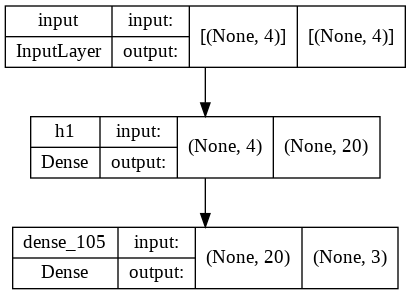

In [ ]:
# model visualization
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
n_epocas = 20
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/20
4/4 [==============================] - 1s 65ms/step - loss: 1.0919 - acc: 0.3333 - val_loss: 1.0831 - val_acc: 0.3333
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 1.0787 - acc: 0.3333 - val_loss: 1.0725 - val_acc: 0.3333
Epoch 3/20
4/4 [==============================] - 0s 11ms/step - loss: 1.0718 - acc: 0.3333 - val_loss: 1.0635 - val_acc: 0.3333
Epoch 4/20
4/4 [==============================] - 0s 11ms/step - loss: 1.0612 - acc: 0.3333 - val_loss: 1.0565 - val_acc: 0.3333
Epoch 5/20
4/4 [==============================] - 0s 12ms/step - loss: 1.0542 - acc: 0.3333 - val_loss: 1.0501 - val_acc: 0.3333
Epoch 6/20
4/4 [==============================] - 0s 12ms/step - loss: 1.0485 - acc: 0.3500 - val_loss: 1.0437 - val_acc: 0.5333
Epoch 7/20
4/4 [==============================] - 0s 12ms/step - loss: 1.0417 - acc: 0.5333 - val_loss: 1.0377 - val_acc: 0.6667
Epoch 8/20
4/4 [==============================] - 0s 12ms/step - loss: 1.0361 - acc: 0.7250 - val

Graficamos la función de pérdida

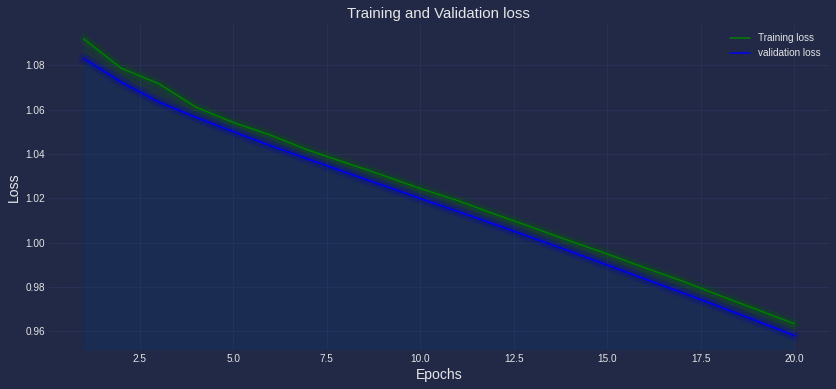

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1, n_epocas+1)

plt.figure(figsize=(14,6))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

Con las siguientes líneas guardamos los pesos y el bias en cada capa

In [ ]:
# pesos y bias primera capa
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]

np.save("iris_weights1.npy",first_layer_weights)
np.save("iris_biases1.npy",first_layer_biases)

# pesos y bias segunda capa
#second_layer_weights = model.layers[2].get_weights()[0]
#second_layer_biases  = model.layers[2].get_weights()[1]

#np.save("iris_weights2.npy",second_layer_weights)
#np.save("iris_biases2.npy",second_layer_biases)

## Métricas de desempeño

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[2 0 2 2 2 2 1 2 0 2 0 0 0 1 1 2 2 1 2 0 2 0 1 0 0 1 1 1 0 2]


In [ ]:

print(f"Test Accuracy: {accuracy_score(y_pred,y_test_original)}")
print(f"Test Recall: {recall_score(y_pred, y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred, y_test_original, average='macro')}")

Test Accuracy: 0.7333333333333333
Test Recall: 0.7361111111111112
Test Precision: 0.7333333333333334


# Graficamos los datos reales vs predichos

In [ ]:
df = pd.DataFrame(X_test, columns=['petal_length','petal_width','sepal_length','sepal_width'])
df['especies'] = y_test_original
df['especies_pred'] = y_pred
df.head()

,petal_length,petal_width,sepal_length,sepal_width,especies,especies_pred
0,6.0,3.0,4.8,1.8,2,2
1,5.2,3.5,1.5,0.2,0,0
2,4.9,2.4,3.3,1.0,1,2
3,5.0,2.3,3.3,1.0,1,2
4,5.8,2.7,5.1,1.9,2,2


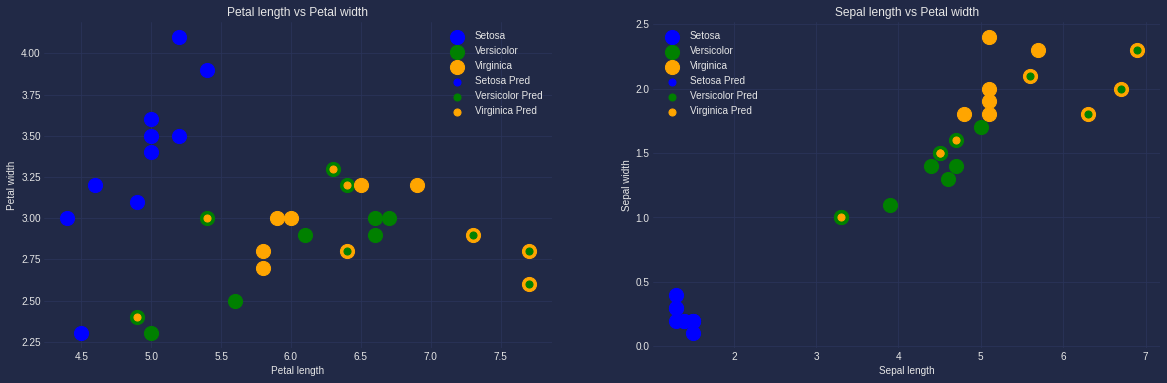

In [ ]:

figure, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.scatter(df[df['especies']==0]['petal_length'], df[df['especies']==0]['petal_width'], marker ="o", s=200, c='blue', label='Setosa')
ax1.scatter(df[df['especies']==1]['petal_length'], df[df['especies']==1]['petal_width'], marker ="o", s=200, c='green', label='Versicolor')
ax1.scatter(df[df['especies']==2]['petal_length'], df[df['especies']==2]['petal_width'], marker ="o",  s=200, c='orange', label='Virginica')
ax1.scatter(df[df['especies_pred']==0]['petal_length'], df[df['especies_pred']==0]['petal_width'], marker ="o", s=50, c='blue', label='Setosa Pred')
ax1.scatter(df[df['especies_pred']==1]['petal_length'], df[df['especies_pred']==1]['petal_width'], marker ="o",  s=50, c='green', label='Versicolor Pred')
ax1.scatter(df[df['especies_pred']==2]['petal_length'], df[df['especies_pred']==2]['petal_width'], marker ="o",  s=50, c='orange', label='Virginica Pred')
ax1.legend()
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')
ax1.set_title('Petal length vs Petal width')
ax2.scatter(df[df['especies']==0]['sepal_length'], df[df['especies']==0]['sepal_width'], marker ="o", s=200, c='blue', label='Setosa')
ax2.scatter(df[df['especies']==1]['sepal_length'], df[df['especies']==1]['sepal_width'], marker ="o", s=200, c='green', label='Versicolor')
ax2.scatter(df[df['especies']==2]['sepal_length'], df[df['especies']==2]['sepal_width'], marker ="o",  s=200, c='orange', label='Virginica')
ax2.scatter(df[df['especies_pred']==0]['sepal_length'], df[df['especies_pred']==0]['sepal_width'], marker ="o", s=50, c='blue', label='Setosa Pred')
ax2.scatter(df[df['especies_pred']==1]['sepal_length'], df[df['especies_pred']==1]['sepal_width'], marker ="o",  s=50, c='green', label='Versicolor Pred')
ax2.scatter(df[df['especies_pred']==2]['sepal_length'], df[df['especies_pred']==2]['sepal_width'], marker ="o",  s=50, c='orange', label='Virginica Pred')
ax2.legend()
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('Sepal length vs Setal width')
mplcyberpunk.add_glow_effects()
plt.show()

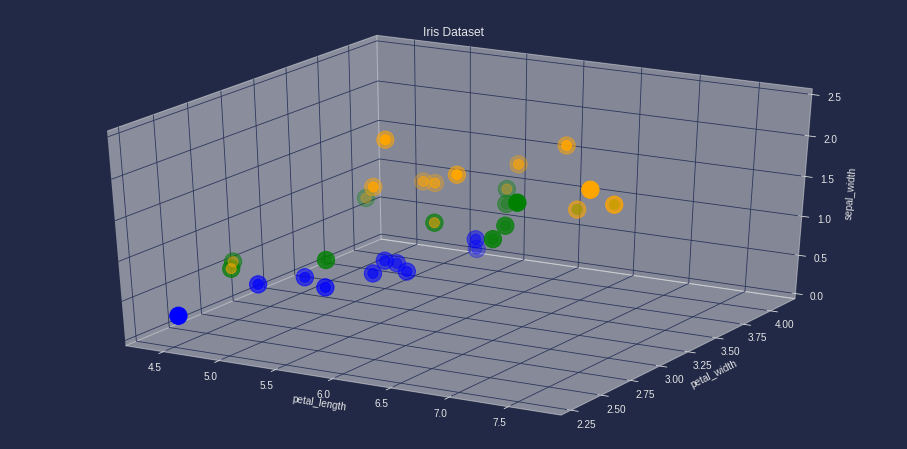

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection="3d")

ax.scatter3D(df['petal_length'][df['especies']==0],
             df['petal_width'][df['especies']==0],
             df['sepal_width'][df['especies']==0], c='blue', marker ="o", s=300)

ax.scatter3D(df['petal_length'][df['especies_pred']==0],
             df['petal_width'][df['especies_pred']==0],
             df['sepal_width'][df['especies_pred']==0], c='blue', marker ="o", s=100)

ax.scatter3D(df['petal_length'][df['especies']==1],
             df['petal_width'][df['especies']==1],
             df['sepal_width'][df['especies']==1], c='green', marker ="o", s=300)

ax.scatter3D(df['petal_length'][df['especies_pred']==1],
             df['petal_width'][df['especies_pred']==1],
             df['sepal_width'][df['especies_pred']==1], c='green', marker ="o", s=100)

ax.scatter3D(df['petal_length'][df['especies']==2],
             df['petal_width'][df['especies']==2],
             df['sepal_width'][df['especies']==2], c='orange', marker ="o", s=300)

ax.scatter3D(df['petal_length'][df['especies_pred']==2],
             df['petal_width'][df['especies_pred']==2],
             df['sepal_width'][df['especies_pred']==2], c='orange', marker ="o", s=100)

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_width')
ax.set_title('Iris Dataset')
plt.show()


## **Conclusión:**

En el gráfico anterior puede apreciarse que el modelo tiene mayor dificultad en clasificar correctamente la clase "Versicolor".

# **Modelo 2:  Mayor complejidad**

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(4,), name='input'))
model2.add(Dense(units=600, activation='sigmoid', name='h1'))
model2.add(Dense(units=600, activation='sigmoid', name='h2'))
model2.add(Dense(units=600, activation='sigmoid', name='h3'))
#model2.add(Dense(units=600, activation='sigmoid', name='h4'))
model2.add(Dense(units=3, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 600)               3000      
                                                                 
 h2 (Dense)                  (None, 600)               360600    
                                                                 
 h3 (Dense)                  (None, 600)               360600    
                                                                 
 dense_106 (Dense)           (None, 3)                 1803      
                                                                 
Total params: 726,003
Trainable params: 726,003
Non-trainable params: 0
_________________________________________________________________


## Fit model

In [ ]:
n_epocas = 50
history = model2.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0874 - acc: 0.9667 - val_loss: 0.0589 - val_acc: 0.9667
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0825 - acc: 0.9667 - val_loss: 0.0753 - val_acc: 0.9667
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0578 - acc: 0.9667 - val_loss: 0.1125 - val_acc: 0.9667
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0625 - acc: 0.9667 - val_loss: 0.0741 - val_acc: 0.9667
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0771 - acc: 0.9500 - val_loss: 0.0621 - val_acc: 0.9667
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1187 - acc: 0.9667 - val_loss: 0.1336 - val_acc: 0.9667
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1193 - acc: 0.9583 - val_loss: 0.1184 - val_acc: 0.9667
Epoch 8/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1179 - acc: 0.9500 - val

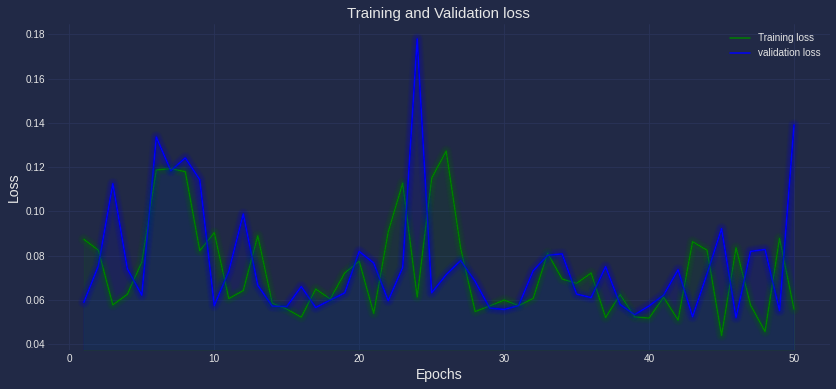

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1, n_epocas+1)

plt.figure(figsize=(14,6))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

# Métricas de desempeño

In [ ]:
## Métricas de desempeño
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(f"Test Accuracy: {accuracy_score(y_pred,y_test_original)}")
print(f"Test Recall: {recall_score(y_pred, y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred, y_test_original, average='macro')}")

Test Accuracy: 0.9333333333333333
Test Recall: 0.9444444444444445
Test Precision: 0.9333333333333332


# Graficamos datos reales vs predichos

In [ ]:
df = pd.DataFrame(X_test, columns=['petal_length','petal_width','sepal_length','sepal_width'])
df['especies'] = y_test_original
df['especies_pred'] = y_pred
df.head()

,petal_length,petal_width,sepal_length,sepal_width,especies,especies_pred
0,6.0,3.0,4.8,1.8,2,1
1,5.2,3.5,1.5,0.2,0,0
2,4.9,2.4,3.3,1.0,1,1
3,5.0,2.3,3.3,1.0,1,1
4,5.8,2.7,5.1,1.9,2,2


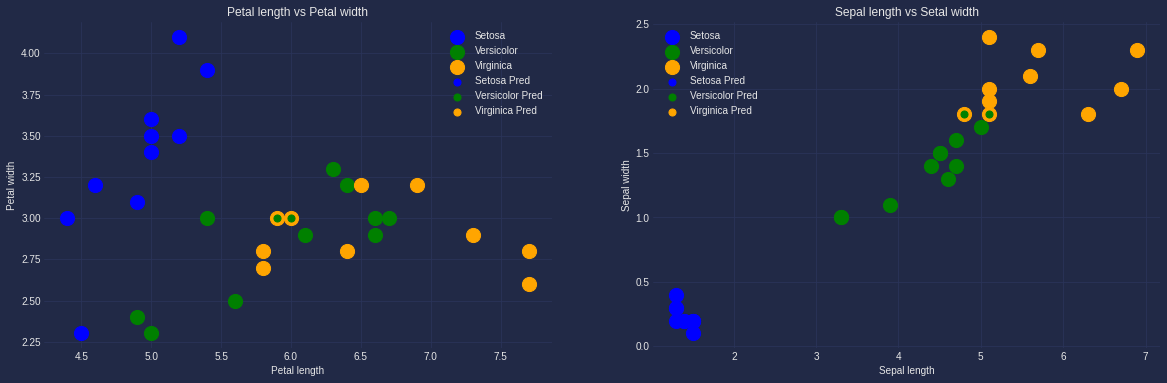

In [ ]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.scatter(df[df['especies']==0]['petal_length'], df[df['especies']==0]['petal_width'], marker ="o", s=200, c='blue', label='Setosa')
ax1.scatter(df[df['especies']==1]['petal_length'], df[df['especies']==1]['petal_width'], marker ="o", s=200, c='green', label='Versicolor')
ax1.scatter(df[df['especies']==2]['petal_length'], df[df['especies']==2]['petal_width'], marker ="o",  s=200, c='orange', label='Virginica')
ax1.scatter(df[df['especies_pred']==0]['petal_length'], df[df['especies_pred']==0]['petal_width'], marker ="o", s=50, c='blue', label='Setosa Pred')
ax1.scatter(df[df['especies_pred']==1]['petal_length'], df[df['especies_pred']==1]['petal_width'], marker ="o",  s=50, c='green', label='Versicolor Pred')
ax1.scatter(df[df['especies_pred']==2]['petal_length'], df[df['especies_pred']==2]['petal_width'], marker ="o",  s=50, c='orange', label='Virginica Pred')
ax1.legend()
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')
ax1.set_title('Petal length vs Petal width')
ax2.scatter(df[df['especies']==0]['sepal_length'], df[df['especies']==0]['sepal_width'], marker ="o", s=200, c='blue', label='Setosa')
ax2.scatter(df[df['especies']==1]['sepal_length'], df[df['especies']==1]['sepal_width'], marker ="o", s=200, c='green', label='Versicolor')
ax2.scatter(df[df['especies']==2]['sepal_length'], df[df['especies']==2]['sepal_width'], marker ="o",  s=200, c='orange', label='Virginica')
ax2.scatter(df[df['especies_pred']==0]['sepal_length'], df[df['especies_pred']==0]['sepal_width'], marker ="o", s=50, c='blue', label='Setosa Pred')
ax2.scatter(df[df['especies_pred']==1]['sepal_length'], df[df['especies_pred']==1]['sepal_width'], marker ="o",  s=50, c='green', label='Versicolor Pred')
ax2.scatter(df[df['especies_pred']==2]['sepal_length'], df[df['especies_pred']==2]['sepal_width'], marker ="o",  s=50, c='orange', label='Virginica Pred')
ax2.legend()
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('Sepal length vs Setal width')
mplcyberpunk.add_glow_effects()
plt.show()

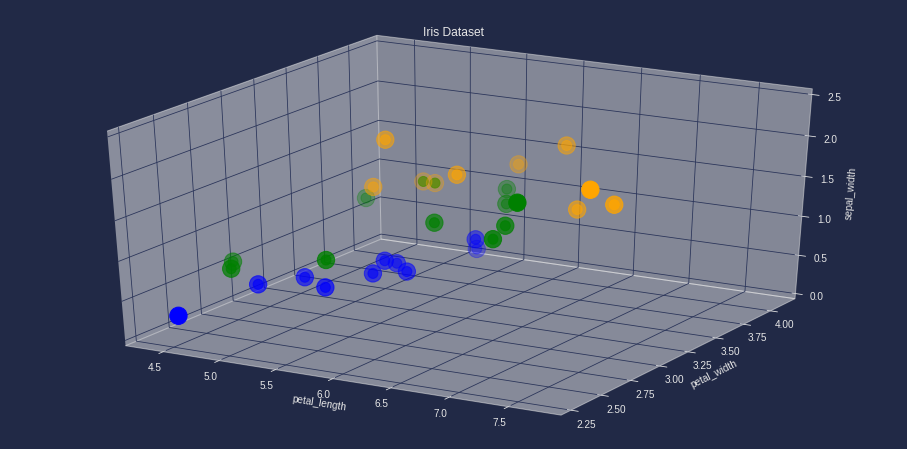

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection="3d")

ax.scatter3D(df['petal_length'][df['especies']==0],
             df['petal_width'][df['especies']==0],
             df['sepal_width'][df['especies']==0], c='blue', marker ="o", s=300)

ax.scatter3D(df['petal_length'][df['especies_pred']==0],
             df['petal_width'][df['especies_pred']==0],
             df['sepal_width'][df['especies_pred']==0], c='blue', marker ="o", s=100)

ax.scatter3D(df['petal_length'][df['especies']==1],
             df['petal_width'][df['especies']==1],
             df['sepal_width'][df['especies']==1], c='green', marker ="o", s=300)

ax.scatter3D(df['petal_length'][df['especies_pred']==1],
             df['petal_width'][df['especies_pred']==1],
             df['sepal_width'][df['especies_pred']==1], c='green', marker ="o", s=100)

ax.scatter3D(df['petal_length'][df['especies']==2],
             df['petal_width'][df['especies']==2],
             df['sepal_width'][df['especies']==2], c='orange', marker ="o", s=300)

ax.scatter3D(df['petal_length'][df['especies_pred']==2],
             df['petal_width'][df['especies_pred']==2],
             df['sepal_width'][df['especies_pred']==2], c='orange', marker ="o", s=100)

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_width')
ax.set_title('Iris Dataset')
plt.show()


# Conclusión:

Con una red neuronal de 3 capas intermedias con 600 neuronas cada una se lográn métricas superiores a 0.96, además la función pérdida no muestra que el modelo sea inadecuado.  

# **Agregando más complejidad: Más capas y más neuronas**

In [ ]:
# function to train Multilayer Perceptron
def ann(activation= 'sigmoid', hidden_layers = [50], n_epocas= 50,  loss='categorical_crossentropy', optimizer='adam'):
        
    model = Sequential()
    # input layer
    model.add(Input(shape=(4,), name='input'))
    # for loop for each layer
    i = 1
    for neurons in hidden_layers:
            name = 'h' + str(i+1)
            model.add(Dense(units= neurons, activation=activation, name=name))
            i += 1
    # ouput layer
    model.add(Dense(units=3, activation='softmax'))
    #model.summary()
    # compile
    model.compile(loss=loss, optimizer=optimizer, metrics=['acc'])
    # fit model
    model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))
    # predicted values
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    
    accuracy = accuracy_score(y_pred,y_test_original)
    recall = recall_score(y_pred, y_test_original,average='macro')
    precision = precision_score(y_pred, y_test_original, average='macro')
    f1score = f1_score(y_pred, y_test_original, average='macro')
    
    print("Test Accuracy: {}".format(accuracy))
    print("Test Precision: {}".format(precision))
    print("Test Recall: {}".format(recall))
    print("Test Recall: {}".format(f1score))
    
    return accuracy, precision, recall, f1score

In [ ]:
# Function to test multiple parameters
def GridSearch(grid):
    
    result = {'Activation': [],
            'Capas': [],
            'Neuronas': [],
            'Epocas' : [],
            'Accuracy': [],
            'Precision': [], 
            'Recall': [],
            'f1score': []}
        
    for activation in grid['activation']:
        for layer in grid['hidden_layers']:
            for epoch in grid['n_epochs']:
                m1, m2, m3, m4 = ann(activation= activation, hidden_layers = layer, n_epocas=epoch, loss='categorical_crossentropy', optimizer='adam')
                result['Activation'].append(activation)
                result['Capas'].append(len(layer))
                result['Neuronas'].append(",".join(map(str, layer)))
                result['Epocas'].append(epoch)
                result['Accuracy'].append(m1)
                result['Precision'].append(m2)
                result['Recall'].append(m3)
                result['f1score'].append(m4)
     
    return pd.DataFrame(result)        

## Prueba 

In [ ]:
ann_grid = {'activation': ['sigmoid', 'relu'],
            'hidden_layers': [[700], 
                              [700, 700], 
                              [700, 700, 700], 
                              [700, 700, 700, 700], 
                              [700, 700, 700, 700, 700],
                              [700, 700, 700, 700, 700, 700],
                              [700, 700, 700, 700, 700, 700, 700]],
            'n_epochs': [20, 40, 50,  100, 300]}
        

In [ ]:
grid = GridSearch(ann_grid)

Epoch 1/20
4/4 [==============================] - 1s 134ms/step - loss: 1.1666 - acc: 0.3167 - val_loss: 1.0983 - val_acc: 0.6000
Epoch 2/20
4/4 [==============================] - 0s 12ms/step - loss: 1.0796 - acc: 0.6000 - val_loss: 1.0246 - val_acc: 0.6667
Epoch 3/20
4/4 [==============================] - 0s 11ms/step - loss: 1.0213 - acc: 0.6583 - val_loss: 0.9992 - val_acc: 0.6667
Epoch 4/20
4/4 [==============================] - 0s 11ms/step - loss: 0.9871 - acc: 0.6417 - val_loss: 0.9444 - val_acc: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 14ms/step - loss: 0.9368 - acc: 0.7417 - val_loss: 0.9204 - val_acc: 0.6667
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 0.9141 - acc: 0.6667 - val_loss: 0.8771 - val_acc: 0.6667
Epoch 7/20
4/4 [==============================] - 0s 11ms/step - loss: 0.8661 - acc: 0.8000 - val_loss: 0.8419 - val_acc: 0.6667
Epoch 8/20
4/4 [==============================] - 0s 12ms/step - loss: 0.8432 - acc: 0.6667 - va

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 87ms/step - loss: 1.6738 - acc: 0.2667 - val_loss: 1.1090 - val_acc: 0.3333
Epoch 2/40
4/4 [==============================] - 0s 34ms/step - loss: 1.2408 - acc: 0.3333 - val_loss: 1.1457 - val_acc: 0.3333
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1407 - acc: 0.3250 - val_loss: 1.1770 - val_acc: 0.3333
Epoch 4/40
4/4 [==============================] - 0s 32ms/step - loss: 1.1496 - acc: 0.3333 - val_loss: 1.0998 - val_acc: 0.3333
Epoch 5/40
4/4 [==============================] - 0s 33ms/step - loss: 1.1878 - acc: 0.3083 - val_loss: 1.1433 - val_acc: 0.3333
Epoch 6/40
4/4 [==============================] - 0s 34ms/step - loss: 1.1184 - acc: 0.3333 - val_loss: 1.1345 - val_acc: 0.3333
Epoch 7/40
4/4 [==============================] - 0s 32ms/step - loss: 1.1213 - acc: 0.3333 - val_loss: 1.1132 - val_acc: 0.3333
Epoch 8/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1151 - acc: 0.3583 - val_loss: 1.11

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 97ms/step - loss: 1.3249 - acc: 0.3750 - val_loss: 1.7225 - val_acc: 0.3333
Epoch 2/40
4/4 [==============================] - 0s 40ms/step - loss: 1.4746 - acc: 0.3000 - val_loss: 1.2729 - val_acc: 0.3333
Epoch 3/40
4/4 [==============================] - 0s 42ms/step - loss: 1.3622 - acc: 0.3333 - val_loss: 1.1168 - val_acc: 0.3333
Epoch 4/40
4/4 [==============================] - 0s 41ms/step - loss: 1.1104 - acc: 0.3583 - val_loss: 1.2120 - val_acc: 0.3333
Epoch 5/40
4/4 [==============================] - 0s 41ms/step - loss: 1.2123 - acc: 0.3333 - val_loss: 1.1232 - val_acc: 0.3333
Epoch 6/40
4/4 [==============================] - 0s 47ms/step - loss: 1.1016 - acc: 0.3750 - val_loss: 1.1388 - val_acc: 0.3333
Epoch 7/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1502 - acc: 0.3333 - val_loss: 1.1313 - val_acc: 0.3333
Epoch 8/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1105 - acc: 0.3333 - val_loss: 1.09

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 106ms/step - loss: 1.4899 - acc: 0.4083 - val_loss: 1.1014 - val_acc: 0.3333
Epoch 2/40
4/4 [==============================] - 0s 43ms/step - loss: 1.3417 - acc: 0.3500 - val_loss: 1.1127 - val_acc: 0.3333
Epoch 3/40
4/4 [==============================] - 0s 46ms/step - loss: 1.2407 - acc: 0.2750 - val_loss: 1.2465 - val_acc: 0.3333
Epoch 4/40
4/4 [==============================] - 0s 46ms/step - loss: 1.1901 - acc: 0.3000 - val_loss: 1.1208 - val_acc: 0.3333
Epoch 5/40
4/4 [==============================] - 0s 45ms/step - loss: 1.1572 - acc: 0.3333 - val_loss: 1.1345 - val_acc: 0.3333
Epoch 6/40
4/4 [==============================] - 0s 45ms/step - loss: 1.1263 - acc: 0.3167 - val_loss: 1.1230 - val_acc: 0.3333
Epoch 7/40
4/4 [==============================] - 0s 47ms/step - loss: 1.1418 - acc: 0.3333 - val_loss: 1.1096 - val_acc: 0.3333
Epoch 8/40
4/4 [==============================] - 0s 50ms/step - loss: 1.1175 - acc: 0.3000 - val_loss: 1.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 107ms/step - loss: 1.7212 - acc: 0.3000 - val_loss: 1.2800 - val_acc: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 45ms/step - loss: 1.3043 - acc: 0.3333 - val_loss: 1.0989 - val_acc: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 45ms/step - loss: 1.1432 - acc: 0.3333 - val_loss: 1.2093 - val_acc: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 1.1440 - acc: 0.3417 - val_loss: 1.1008 - val_acc: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 44ms/step - loss: 1.1656 - acc: 0.3333 - val_loss: 1.1614 - val_acc: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 46ms/step - loss: 1.1369 - acc: 0.3417 - val_loss: 1.1235 - val_acc: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 45ms/step - loss: 1.1248 - acc: 0.3417 - val_loss: 1.1265 - val_acc: 0.3333
Epoch 8/50
4/4 [==============================] - 0s 43ms/step - loss: 1.1318 - acc: 0.3333 - val_loss: 1.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 110ms/step - loss: 1.4891 - acc: 0.3500 - val_loss: 1.2954 - val_acc: 0.3333
Epoch 2/40
4/4 [==============================] - 0s 54ms/step - loss: 1.3758 - acc: 0.3500 - val_loss: 1.1746 - val_acc: 0.3333
Epoch 3/40
4/4 [==============================] - 0s 53ms/step - loss: 1.1543 - acc: 0.3917 - val_loss: 1.2302 - val_acc: 0.3333
Epoch 4/40
4/4 [==============================] - 0s 50ms/step - loss: 1.1657 - acc: 0.3417 - val_loss: 1.1215 - val_acc: 0.3333
Epoch 5/40
4/4 [==============================] - 0s 48ms/step - loss: 1.1593 - acc: 0.3333 - val_loss: 1.1419 - val_acc: 0.3333
Epoch 6/40
4/4 [==============================] - 0s 49ms/step - loss: 1.1306 - acc: 0.3333 - val_loss: 1.1096 - val_acc: 0.3333
Epoch 7/40
4/4 [==============================] - 0s 56ms/step - loss: 1.1424 - acc: 0.2750 - val_loss: 1.1340 - val_acc: 0.3333
Epoch 8/40
4/4 [==============================] - 0s 47ms/step - loss: 1.1180 - acc: 0.3000 - val_loss: 1.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 113ms/step - loss: 1.7934 - acc: 0.3083 - val_loss: 1.1746 - val_acc: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 50ms/step - loss: 1.5831 - acc: 0.3333 - val_loss: 1.3172 - val_acc: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 50ms/step - loss: 1.2201 - acc: 0.3333 - val_loss: 1.2705 - val_acc: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 49ms/step - loss: 1.3180 - acc: 0.3333 - val_loss: 1.1604 - val_acc: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 51ms/step - loss: 1.1283 - acc: 0.3750 - val_loss: 1.1679 - val_acc: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 50ms/step - loss: 1.1959 - acc: 0.3333 - val_loss: 1.1727 - val_acc: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 56ms/step - loss: 1.1370 - acc: 0.3333 - val_loss: 1.0994 - val_acc: 0.3333
Epoch 8/50
4/4 [==============================] - 0s 49ms/step - loss: 1.1182 - acc: 0.3167 - val_loss: 1.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 2s 287ms/step - loss: 1.4496 - acc: 0.3250 - val_loss: 1.3178 - val_acc: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 50ms/step - loss: 1.2595 - acc: 0.3333 - val_loss: 1.1219 - val_acc: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 49ms/step - loss: 1.2366 - acc: 0.3417 - val_loss: 1.1869 - val_acc: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 54ms/step - loss: 1.1211 - acc: 0.3500 - val_loss: 1.1464 - val_acc: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 49ms/step - loss: 1.1942 - acc: 0.3333 - val_loss: 1.1600 - val_acc: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 49ms/step - loss: 1.1167 - acc: 0.3333 - val_loss: 1.1367 - val_acc: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 48ms/step - loss: 1.1476 - acc: 0.3333 - val_loss: 1.1083 - val_acc: 0.3333
Epoch 8/100
4/4 [==============================] - 0s 49ms/step - loss: 1.1127 - acc: 0.2917 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch 37/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0947 - acc: 0.9667 - val_loss: 0.0382 - val_acc: 1.0000
Epoch 38/50
4/4 [==============================] - 0s 39ms/step - loss: 0.1007 - acc: 0.9750 - val_loss: 0.0477 - val_acc: 1.0000
Epoch 39/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0747 - acc: 0.9750 - val_loss: 0.0584 - val_acc: 0.9667
Epoch 40/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0678 - acc: 0.9750 - val_loss: 0.0539 - val_acc: 0.9667
Epoch 41/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0886 - acc: 0.9667 - val_loss: 0.0385 - val_acc: 1.0000
Epoch 42/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0792 - acc: 0.9583 - val_loss: 0.0364 - val_acc: 1.0000
Epoch 43/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0873 - acc: 0.9750 - val_loss: 0.0537 - val_acc: 0.9667
Epoch 44/50
4/4 [======

## **Resultados**

In [ ]:
# summary table
grid[grid['Activation']=='sigmoid']

,Activation,Capas,Neuronas,Epocas,Accuracy,Precision,Recall,f1score
0,sigmoid,1,700,20,0.766667,0.766667,0.862745,0.734093
1,sigmoid,1,700,40,0.933333,0.933333,0.944444,0.932660
2,sigmoid,1,700,50,0.933333,0.933333,0.944444,0.932660
3,sigmoid,1,700,100,0.966667,0.966667,0.969697,0.966583
4,sigmoid,1,700,300,0.966667,0.966667,0.969697,0.966583
5,sigmoid,2,"700,700",20,0.966667,0.966667,0.969697,0.966583
6,sigmoid,2,"700,700",40,0.933333,0.933333,0.944444,0.932660
7,sigmoid,2,"700,700",50,0.966667,0.966667,0.969697,0.966583
8,sigmoid,2,"700,700",100,0.966667,0.966667,0.969697,0.966583
9,sigmoid,2,"700,700",300,0.966667,0.966667,0.969697,0.966583


In [ ]:
# summary table
grid[grid['Activation']=='relu']

,Activation,Capas,Neuronas,Epocas,Accuracy,Precision,Recall,f1score
35,relu,1,700,20,0.966667,0.966667,0.969697,0.966583
36,relu,1,700,40,1.000000,1.000000,1.000000,1.000000
37,relu,1,700,50,1.000000,1.000000,1.000000,1.000000
38,relu,1,700,100,1.000000,1.000000,1.000000,1.000000
39,relu,1,700,300,1.000000,1.000000,1.000000,1.000000
40,relu,2,"700,700",20,0.966667,0.966667,0.969697,0.966583
41,relu,2,"700,700",40,1.000000,1.000000,1.000000,1.000000
42,relu,2,"700,700",50,1.000000,1.000000,1.000000,1.000000
43,relu,2,"700,700",100,1.000000,1.000000,1.000000,1.000000
44,relu,2,"700,700",300,1.000000,1.000000,1.000000,1.000000


# **Conclusión**

A manera de conslusión, de la tabla anterior podemos apreciar que aumentar la complejidad no siempre lleva a obtener buenos resultados. Por otro lado, con $1$ capa de $700$ neuronas y $40$ épocas se logró el $100\%$ en todas la métricas empleando la función de activación **relu**.